In [70]:
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
%matplotlib inline

In [71]:
tf.reset_default_graph()
tf.set_random_seed(2)
np.random.seed(2)

In [72]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1) 
print(x.shape)
y = np.sinc(5*x)
print(y.shape)

(300, 1)
(300, 1)


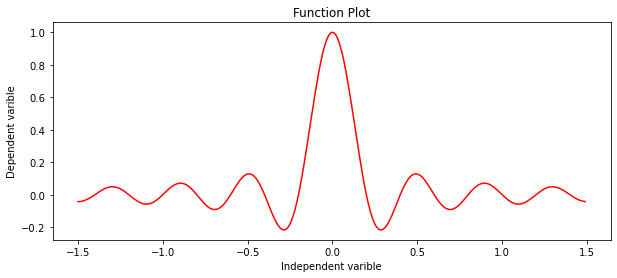

In [73]:
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "red")
plt.title('Function Plot')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

In [74]:
in_x = tf.placeholder(tf.float32, [None, 1])
out_y = tf.placeholder(tf.float32, [None, 1])

### Train Model

In [75]:
def train_model():
    epoch_arr, loss_arr = [], []
    max_epochs = 500
    epoch = 0
    convergence = False
    while not convergence:
        epoch +=1

        for i in range(300):
            _, l, pred = sess.run([opt, loss, out], feed_dict={in_x: x, out_y: y})

        epoch_arr.append(epoch)
        loss_arr.append(l)

        if epoch % 50 == 0:
            print('Epoch: {}/{},  Loss Model : {}'.format(epoch, max_epochs, l))

        if epoch >= max_epochs:
            convergence = True
            print('Max epochs reached')

    print('\nModel Training completed\n')
    print('Epoch: {}/{},  Loss Model : {}'.format(epoch, max_epochs, l))
    return loss_arr, pred

## Model 1

In [76]:
h1 = tf.layers.dense(inputs = in_x, units = 5, activation = tf.nn.relu, name='h1')
h2 = tf.layers.dense(inputs = h1, units = 10, activation = tf.nn.relu, name='h2')
h3 = tf.layers.dense(inputs = h2, units = 10, activation = tf.nn.relu, name='h3')
h4 = tf.layers.dense(inputs = h3, units = 10, activation = tf.nn.relu, name='h4')
h5 = tf.layers.dense(inputs = h4, units = 10, activation = tf.nn.relu, name='h5')
h6 = tf.layers.dense(inputs = h5, units = 10, activation = tf.nn.relu, name='h6')
h7 = tf.layers.dense(inputs = h6, units = 5, activation = tf.nn.relu, name='h7')

out = tf.layers.dense(inputs=h7, units=1, name='out') 

params = np.sum([np.prod(v.shape) for v in tf.trainable_variables()]).value
print("Number of parameters of Model 1:" , params)

Number of parameters of Model 1: 571


C:\Users\nikhi\anaconda3\lib\site-packages\keras\legacy_tf_layers\core.py:236: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
C:\Users\nikhi\anaconda3\lib\site-packages\keras\engine\base_layer_v1.py:1676: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


In [77]:
loss = tf.losses.mean_squared_error(out_y, out)
GD = tf.train.GradientDescentOptimizer(learning_rate=0.01)
grads = GD.compute_gradients(loss)
opt = GD.apply_gradients(grads)

In [78]:
sess = tf.InteractiveSession() #session allows to execute graphs or part of graphs by allocating resources
sess.run(tf.global_variables_initializer())
m1_loss_arr, m1_pred = train_model()

C:\Users\nikhi\anaconda3\lib\site-packages\tensorflow\python\client\session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 50/500,  Loss Model : 0.0037072463892400265
Epoch: 100/500,  Loss Model : 0.00344471144489944
Epoch: 150/500,  Loss Model : 0.0028693771455436945
Epoch: 200/500,  Loss Model : 0.0023967998567968607
Epoch: 250/500,  Loss Model : 0.0020329446997493505
Epoch: 300/500,  Loss Model : 0.0019462144700810313
Epoch: 350/500,  Loss Model : 0.0016073030419647694
Epoch: 400/500,  Loss Model : 0.0015731434104964137
Epoch: 450/500,  Loss Model : 0.0014236759161576629
Epoch: 500/500,  Loss Model : 0.0013278542319312692
Max epochs reached

Model Training completed

Epoch: 500/500,  Loss Model : 0.0013278542319312692


## Model 2

In [79]:
tf.reset_default_graph()
in_x = tf.placeholder(tf.float32, [None, 1])
out_y = tf.placeholder(tf.float32, [None, 1])

In [80]:
h1 = tf.layers.dense(inputs = in_x, units = 10, activation = tf.nn.relu, name='h1')
h2 = tf.layers.dense(inputs = h1, units = 18, activation = tf.nn.relu, name='h2')
h3 = tf.layers.dense(inputs = h2, units = 15, activation = tf.nn.relu, name='h3')
h4 = tf.layers.dense(inputs = h3, units = 4, activation = tf.nn.relu, name='h4')

out = tf.layers.dense(inputs=h4, units=1, name='out') 

params = np.sum([np.prod(v.shape) for v in tf.trainable_variables()]).value
print("Number of parameters of Model 2:" , params)

Number of parameters of Model 2: 572


In [81]:
loss = tf.losses.mean_squared_error(out_y, out)
GD = tf.train.GradientDescentOptimizer(learning_rate=0.01)
grads = GD.compute_gradients(loss)
opt = GD.apply_gradients(grads)

In [82]:
sess = tf.InteractiveSession() #session allows to execute graphs or part of graphs by allocating resources
sess.run(tf.global_variables_initializer())
m2_loss_arr, m2_pred = train_model()

Epoch: 50/500,  Loss Model : 0.005421493202447891
Epoch: 100/500,  Loss Model : 0.005386859644204378
Epoch: 150/500,  Loss Model : 0.005249047186225653
Epoch: 200/500,  Loss Model : 0.0050326501950621605
Epoch: 250/500,  Loss Model : 0.0031540184281766415
Epoch: 300/500,  Loss Model : 0.002502993680536747
Epoch: 350/500,  Loss Model : 0.0024245877284556627
Epoch: 400/500,  Loss Model : 0.0024002378340810537
Epoch: 450/500,  Loss Model : 0.0023905353154987097
Epoch: 500/500,  Loss Model : 0.002383900573477149
Max epochs reached

Model Training completed

Epoch: 500/500,  Loss Model : 0.002383900573477149


## Model 3

In [83]:
tf.reset_default_graph()
in_x = tf.placeholder(tf.float32, [None, 1])
out_y = tf.placeholder(tf.float32, [None, 1])

In [84]:
h1 = tf.layers.dense(inputs = in_x, units = 190, activation = tf.nn.relu, name='h1')
out = tf.layers.dense(inputs=h1, units=1, name='out') 

params = np.sum([np.prod(v.shape) for v in tf.trainable_variables()]).value
print("Number of parameters of Model 3:" , params)

Number of parameters of Model 3: 571


In [85]:
loss = tf.losses.mean_squared_error(out_y, out)
GD = tf.train.GradientDescentOptimizer(learning_rate=0.01)
grads = GD.compute_gradients(loss)
opt = GD.apply_gradients(grads)

In [86]:
sess = tf.InteractiveSession() #session allows to execute graphs or part of graphs by allocating resources
sess.run(tf.global_variables_initializer())
m3_loss_arr, m3_pred = train_model()

Epoch: 50/500,  Loss Model : 0.026215696707367897
Epoch: 100/500,  Loss Model : 0.013407176360487938
Epoch: 150/500,  Loss Model : 0.008115599863231182
Epoch: 200/500,  Loss Model : 0.00625041825696826
Epoch: 250/500,  Loss Model : 0.005580896511673927
Epoch: 300/500,  Loss Model : 0.005312704481184483
Epoch: 350/500,  Loss Model : 0.005171929951757193
Epoch: 400/500,  Loss Model : 0.0051022726111114025
Epoch: 450/500,  Loss Model : 0.005059083923697472
Epoch: 500/500,  Loss Model : 0.005031152628362179
Max epochs reached

Model Training completed

Epoch: 500/500,  Loss Model : 0.005031152628362179


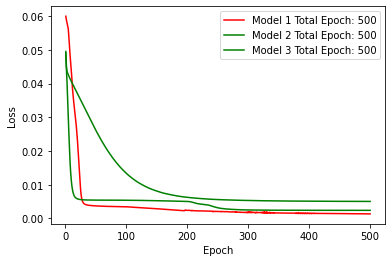

In [87]:
plt.cla()
plt.plot(epoch_arr, m1_loss_arr, 'r', label="Model 1 Total Epoch: {}".format(epoch))
plt.plot(epoch_arr, m2_loss_arr, 'g', label="Model 2 Total Epoch: {}".format(epoch))
plt.plot(epoch_arr, m3_loss_arr, 'g', label="Model 3 Total Epoch: {}".format(epoch))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

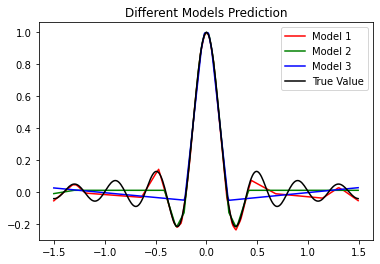

In [88]:
plt.plot(x, m1_pred, 'r', label='Model 1')
plt.plot(x, m2_pred, 'g', label='Model 2')
plt.plot(x, m3_pred, 'b', Label='Model 3')
plt.plot(x, y, 'black', label='True Value')
plt.title('Different Models Prediction')
plt.legend()
plt.show()